In [61]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
import warnings

In [62]:
warnings.filterwarnings("ignore")

In [63]:
data=pd.read_csv('/content/creditcard.csv')

In [64]:
data.shape

(284807, 31)

In [65]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [66]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [70]:
data.duplicated().sum()

1081

In [71]:
data= data.drop_duplicates()

In [72]:
data.shape

(283726, 31)

In [73]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


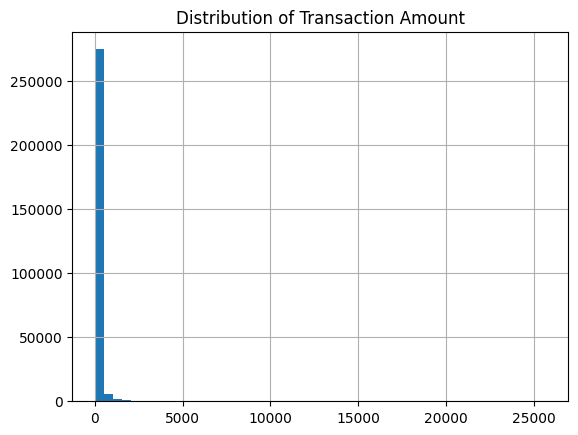

Text(0.5, 1.0, 'Distribution of Transaction Time')

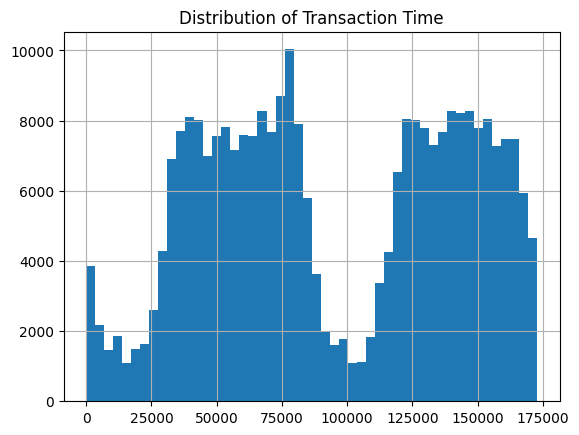

In [74]:
data['Amount'].hist(bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

data['Time'].hist(bins=50)
plt.title('Distribution of Transaction Time')

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

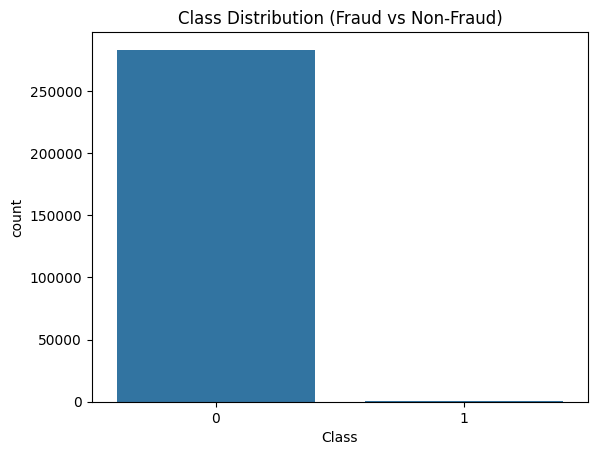

In [75]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

Text(0.5, 1.0, 'Box Plot for Transaction Time')

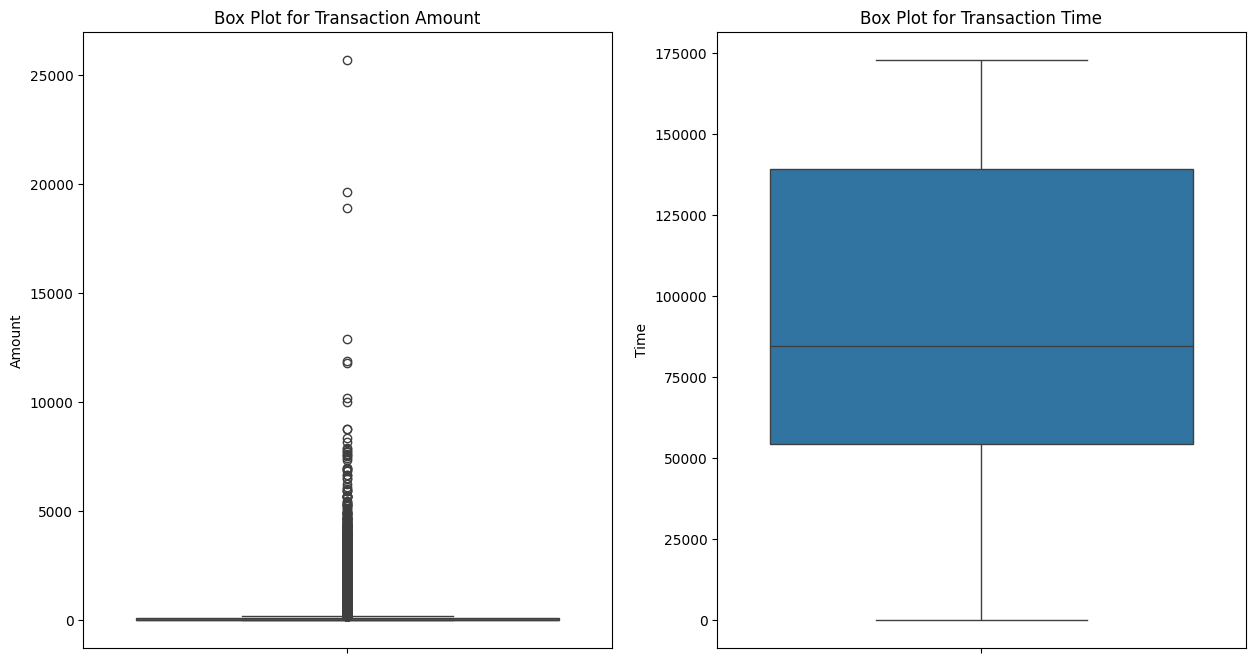

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(y='Amount', data=data, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=data, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

Text(0.5, 1.0, 'Transaction Time by Class')

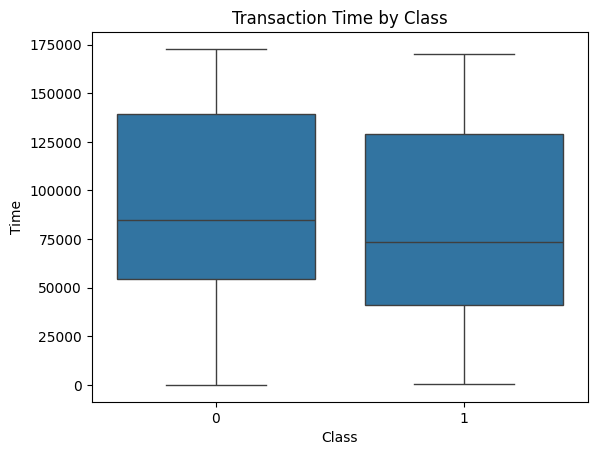

In [77]:
sns.boxplot(x='Class', y='Time', data=data)
plt.title("Transaction Time by Class")

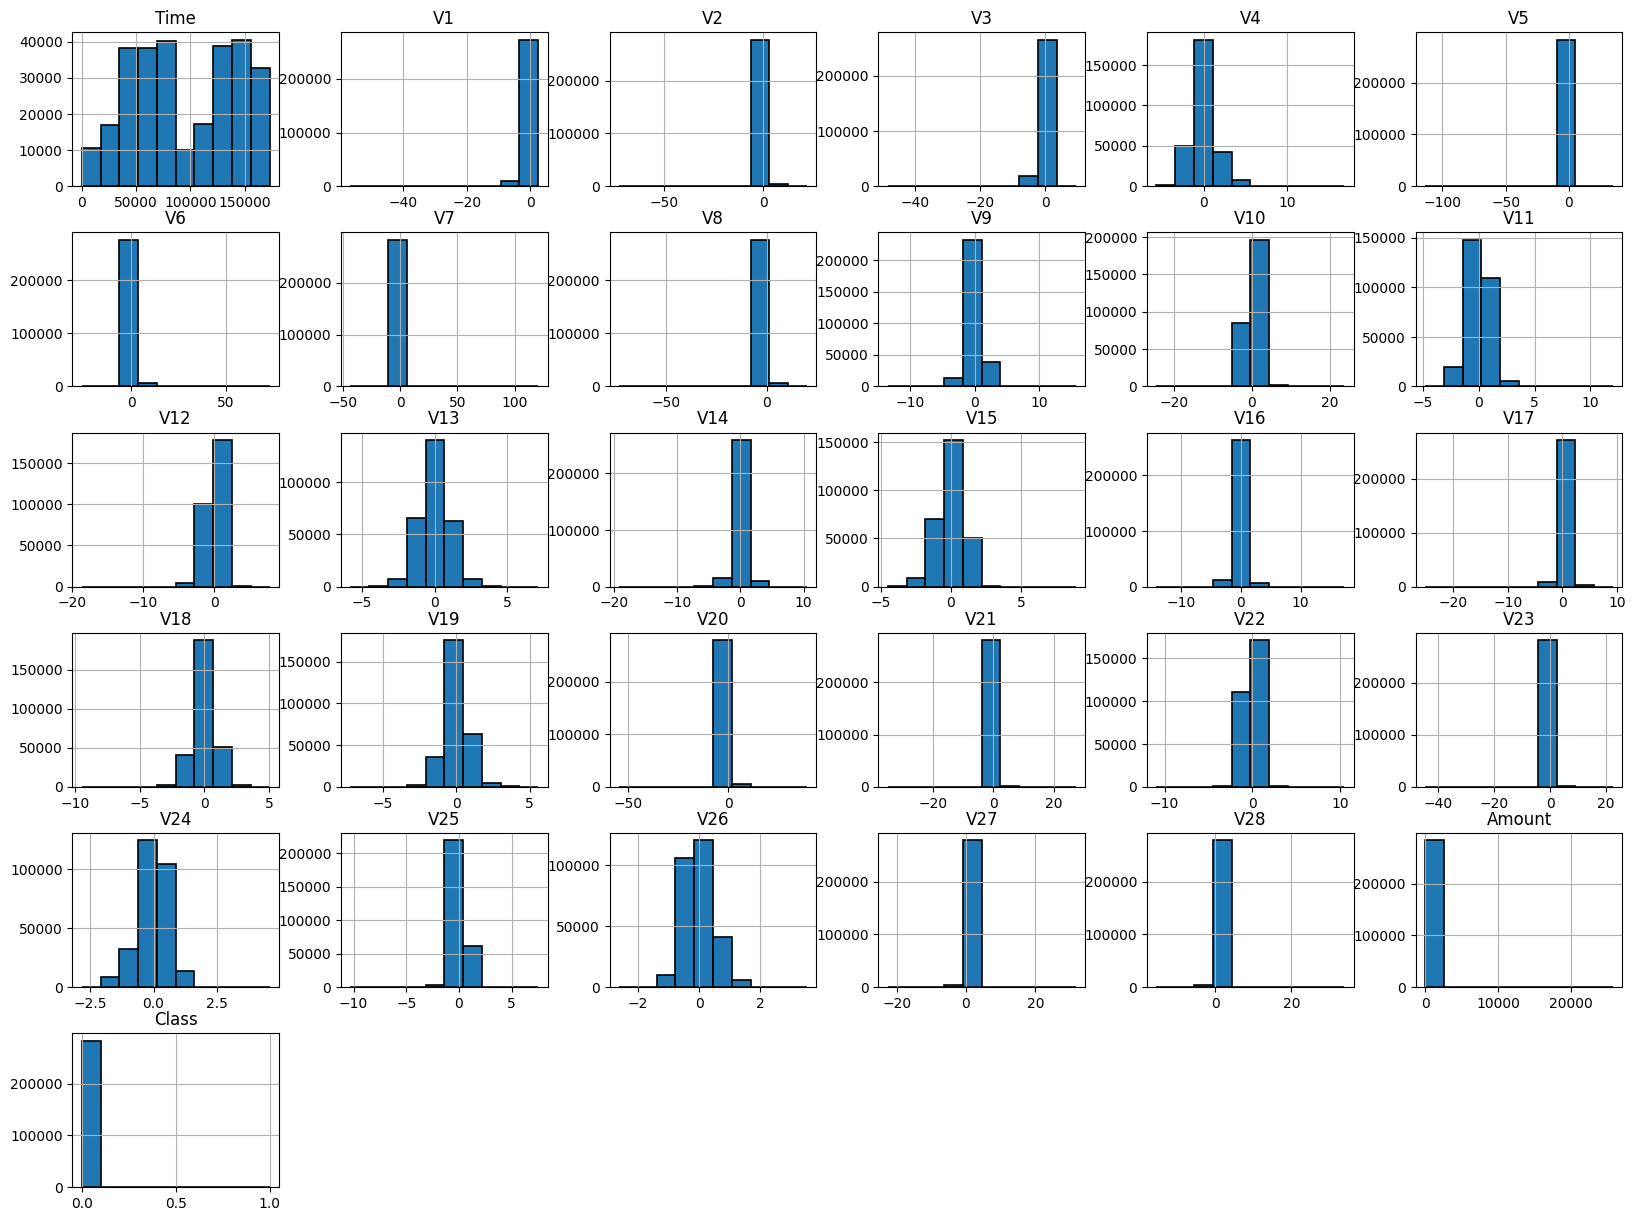

In [78]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

Text(0.5, 1.0, 'Amount Distributions: Fraud vs Non-Fraud')

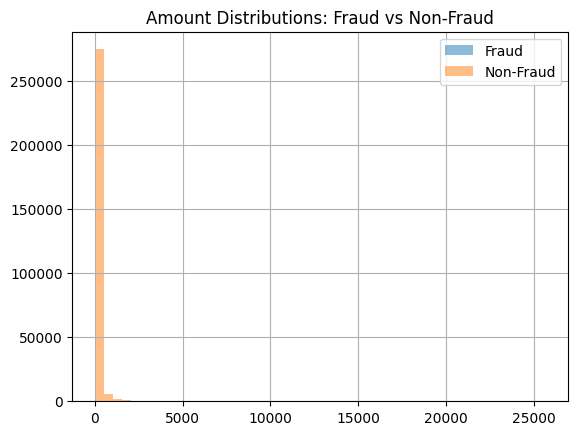

In [79]:
fraud =data[data['Class'] == 1]
non_fraud =data[data['Class'] == 0]

fraud['Amount'].hist(alpha=0.5, label='Fraud', bins=50)
non_fraud['Amount'].hist(alpha=0.5, label='Non-Fraud', bins=50)
plt.legend()
plt.title('Amount Distributions: Fraud vs Non-Fraud')

Text(0.5, 1.0, 'Time Distributions: Fraud vs Non-Fraud')

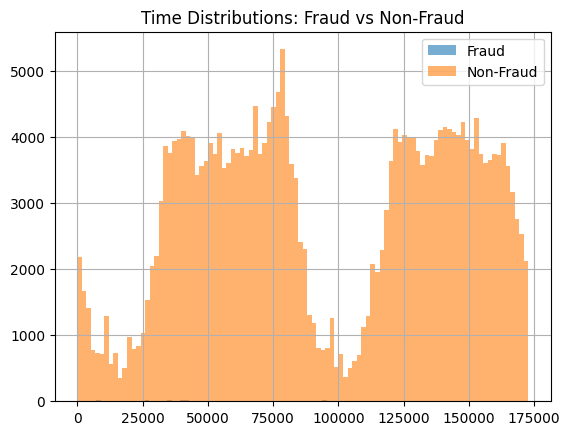

In [80]:
fraud['Time'].hist(alpha=0.6, label='Fraud', bins=100)
non_fraud['Time'].hist(alpha=0.6, label='Non-Fraud', bins=100)
plt.legend()
plt.title('Time Distributions: Fraud vs Non-Fraud')

Text(0.5, 1.0, 'Scatter plot between V1 and V2 (colored by Class)')

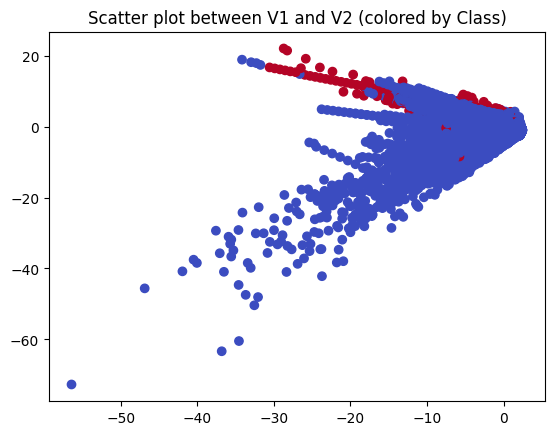

In [81]:
plt.scatter(data['V1'], data['V2'], c=data['Class'], cmap='coolwarm')
plt.title('Scatter plot between V1 and V2 (colored by Class)')

Text(0.5, 1.0, 'Correlation Matrix of Features')

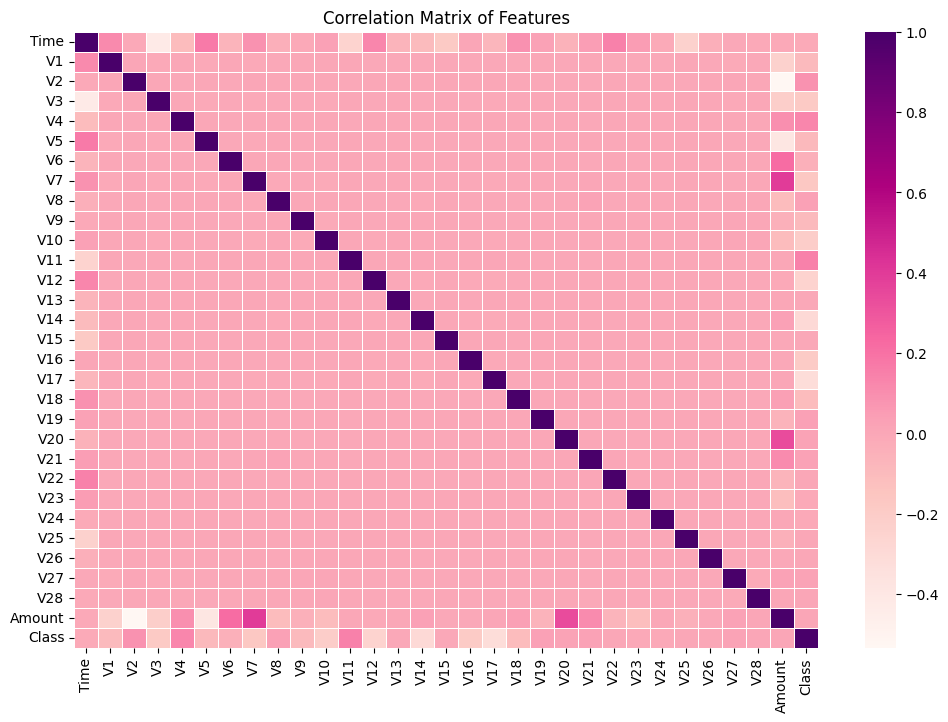

In [82]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")

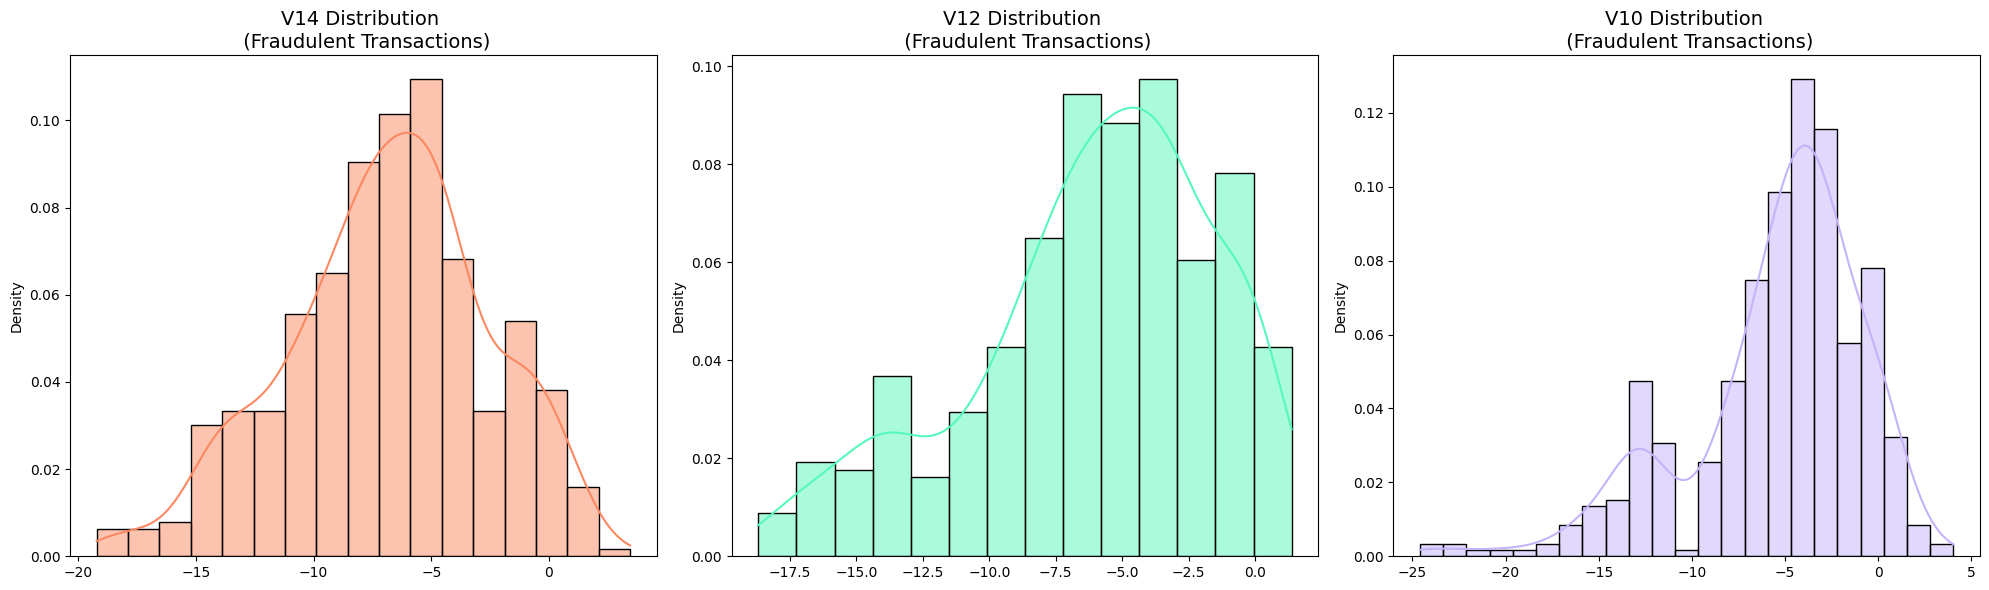

In [83]:
# Set up the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat='density')
ax1.set_title('V14 Distribution \n (Fraudulent Transactions)', fontsize=14)

v12_fraud_dist = data['V12'].loc[data['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat='density')
ax2.set_title('V12 Distribution \n (Fraudulent Transactions)', fontsize=14)

v10_fraud_dist = data['V10'].loc[data['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat='density')
ax3.set_title('V10 Distribution \n (Fraudulent Transactions)', fontsize=14)
plt.tight_layout()

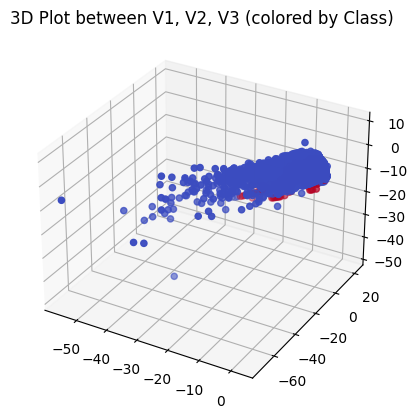

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['V1'], data['V2'], data['V3'], c=data['Class'], cmap='coolwarm')
plt.title('3D Plot between V1, V2, V3 (colored by Class)')
plt.show()

In [85]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot for Transaction Time')

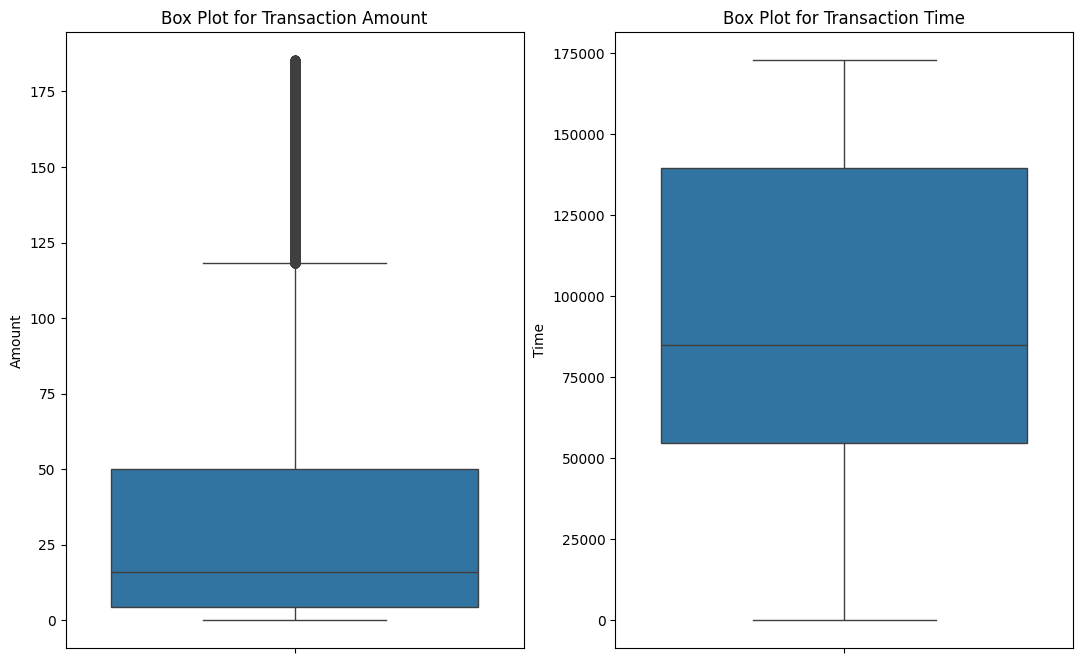

In [86]:
# Create box plots for 'Amount' and 'Time'
fig, ax = plt.subplots(1, 2, figsize=(13, 8))
sns.boxplot(y='Amount', data=df_clean, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=df_clean, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

In [87]:
features_to_scale=['Amount']
data['Amount'] = np.log(data['Amount'] + 1)

In [88]:
data.shape

(283726, 31)

In [89]:
features = ['V10','V11', 'V12', 'V13', 'V14','V16','V17']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [90]:
data.shape

(283726, 31)

Text(0, 0.5, 'Features')

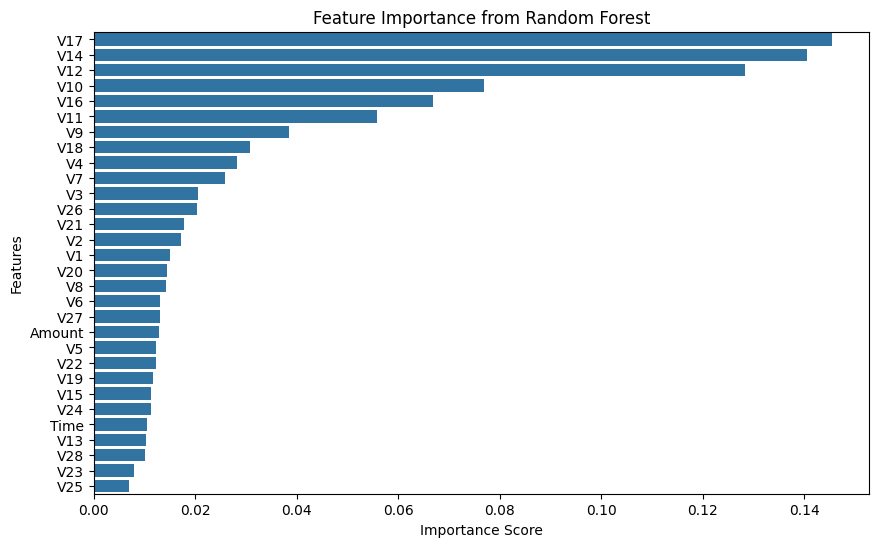

In [91]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Get feature importance
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')

In [92]:
data[data['Class'] == 0]['Class'].value_counts()
data[data['Class'] == 1]['Class'].value_counts()

,count
Class,
1,473


In [93]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy=0.6, random_state=42)

In [94]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

Before resampling: Counter({0: 198269, 1: 339})
After resampling: Counter({0: 198269, 1: 118961})


In [95]:
data = pd.DataFrame(X_resampled, columns=X.columns) #Combine the resampled X and y into a new DataFrame
data['Class'] = y_resampled

In [96]:
data.shape

(317230, 31)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

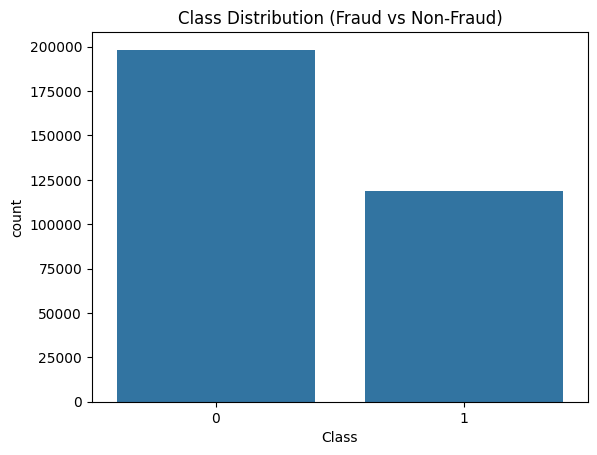

In [97]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

In [98]:
data.duplicated().sum()

0

In [99]:
data[data['Class'] == 0]['Class'].value_counts()
data[data['Class'] == 1]['Class'].value_counts()

,count
Class,
1,118961


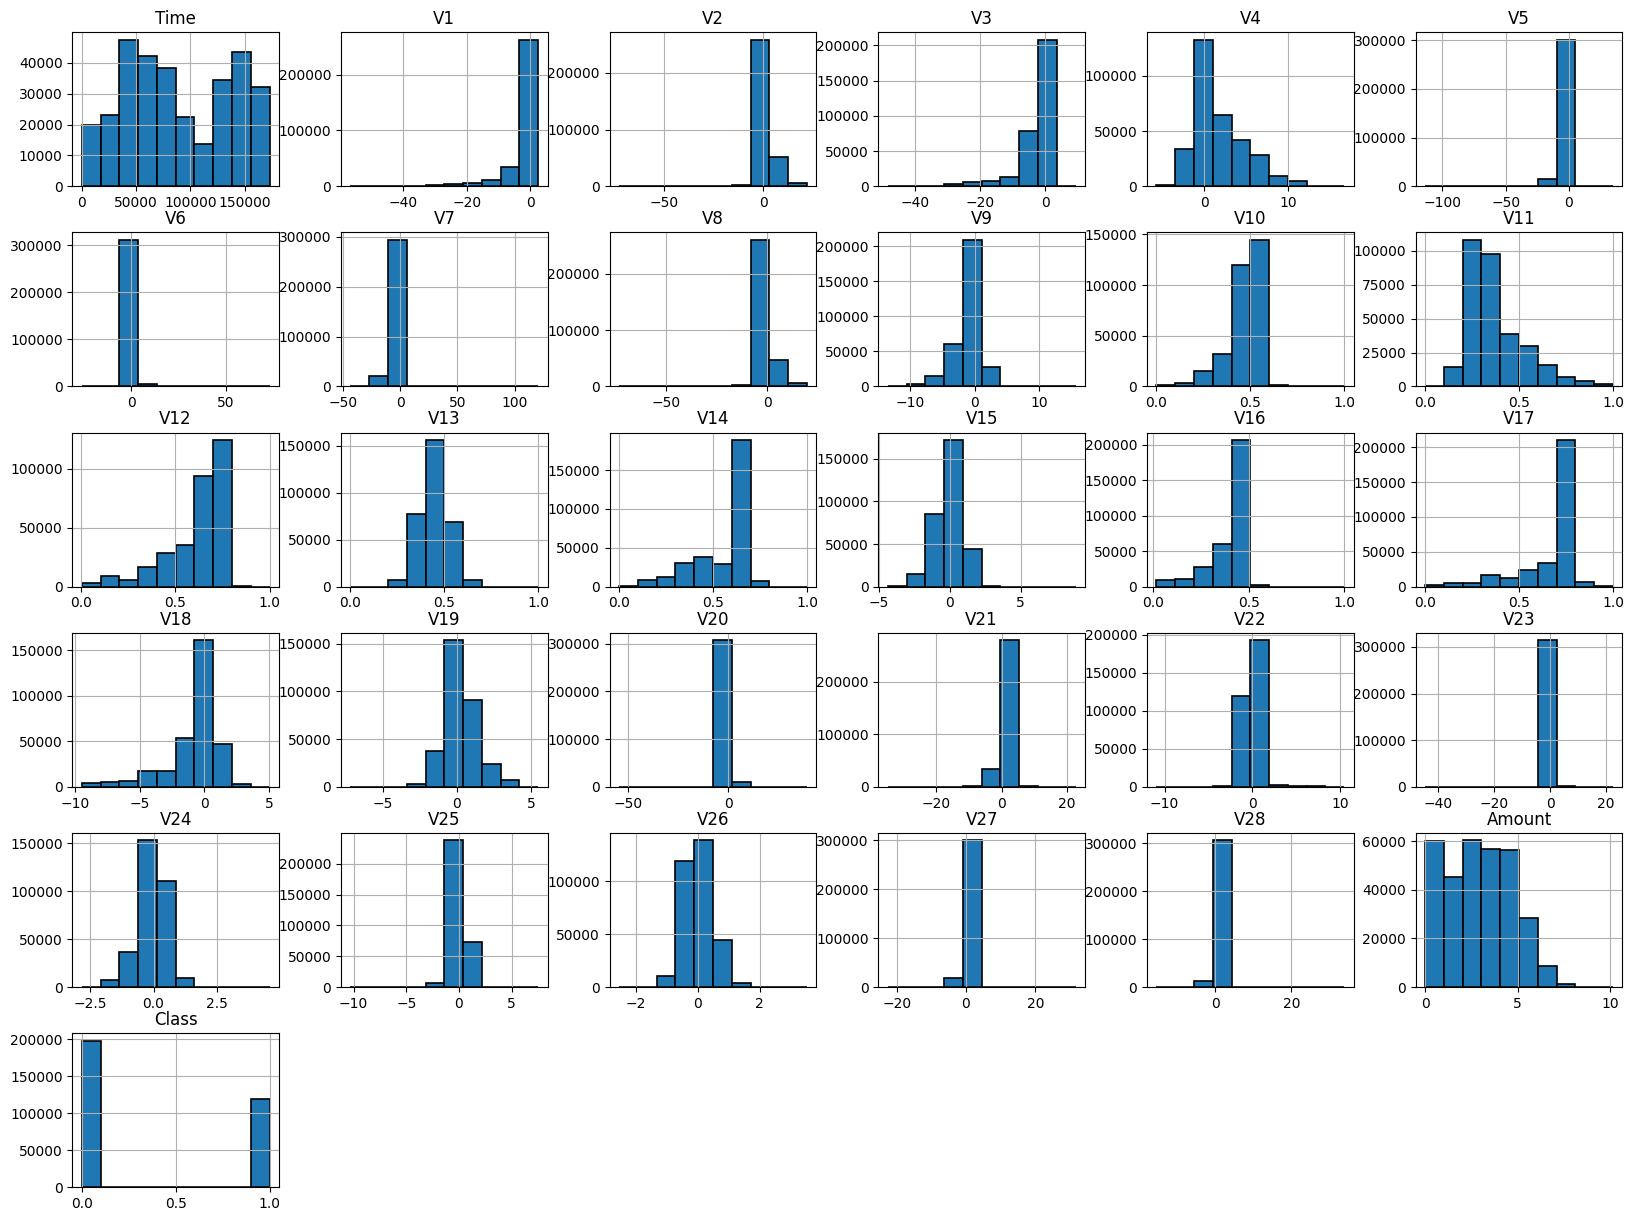

In [100]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

In [101]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l2',           # L2 regularization to prevent overfitting
        C=2.0,                  # Regularization strength (lower value = stronger regularization)
        solver='liblinear',
        max_iter=1000
    ),

    "KNearest": KNeighborsClassifier(
         n_neighbors=10,
    ),
    "XGB Classifier": XGBClassifier(
        max_depth=3,            # Limits the depth of the tree to reduce overfitting
        learning_rate=1,
        n_estimators=9,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1,           # L2 regularization term to prevent overfitting
        reg_alpha=0.2           # L1 regularization term
    ),

    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=150,            # Limit depth of the tree to prevent overfitting
        min_samples_split=25,
        min_samples_leaf=15,
        max_features='sqrt',
        ccp_alpha=0.01
    )
}

In [103]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}\n")

Results for LogisticRegression:
Accuracy: 0.9305
Precision: 0.9648
Recall: 0.8449
F1 Score: 0.9009

Results for KNearest:
Accuracy: 0.9225
Precision: 0.9468
Recall: 0.8398
F1 Score: 0.8901

Results for XGB Classifier:
Accuracy: 0.9840
Precision: 0.9838
Recall: 0.9733
F1 Score: 0.9785

Results for DecisionTreeClassifier:
Accuracy: 0.9374
Precision: 0.9537
Recall: 0.8750
F1 Score: 0.9127



In [105]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Training data performance
    print(f"Training Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1):.4f}\n")

    # Testing data performance
    print(f"Testing Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}\n")

Training Results for LogisticRegression:
Accuracy: 0.9301
Precision: 0.9626
Recall: 0.8466
F1 Score: 0.9009

Testing Results for LogisticRegression:
Accuracy: 0.9305
Precision: 0.9648
Recall: 0.8449
F1 Score: 0.9009

Training Results for KNearest:
Accuracy: 0.9368
Precision: 0.9622
Recall: 0.8657
F1 Score: 0.9114

Testing Results for KNearest:
Accuracy: 0.9225
Precision: 0.9468
Recall: 0.8398
F1 Score: 0.8901

Training Results for XGB Classifier:
Accuracy: 0.9845
Precision: 0.9842
Recall: 0.9745
F1 Score: 0.9793

Testing Results for XGB Classifier:
Accuracy: 0.9840
Precision: 0.9838
Recall: 0.9733
F1 Score: 0.9785

Training Results for DecisionTreeClassifier:
Accuracy: 0.9490
Precision: 0.9355
Recall: 0.9281
F1 Score: 0.9318

Testing Results for DecisionTreeClassifier:
Accuracy: 0.9487
Precision: 0.9344
Recall: 0.9279
F1 Score: 0.9312



In [106]:
param_grid = {
   'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear'],
        'max_iter': [100, 200]
}
clf = LogisticRegression()
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for LogisticRegressionClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for LogisticRegressionClassifier: {grid_search.best_score_:.4f}")

Best parameters for LogisticRegressionClassifier: {'C': 10.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegressionClassifier: 0.9619


In [107]:
param_grid = {
   'n_neighbors': [3, 5, 7, 9, 11]
}
clf =KNeighborsClassifier()
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNeighborsClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for KNeighborsClassifier: {grid_search.best_score_:.4f}")

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score for KNeighborsClassifier: 0.9266


Model Evaluation Metrics on Test Data:
Accuracy: 0.9840
Precision: 0.9838
Recall: 0.9733
F1 Score: 0.9785
Confusion Matrix:
 [[59007   570]
 [  949 34643]]


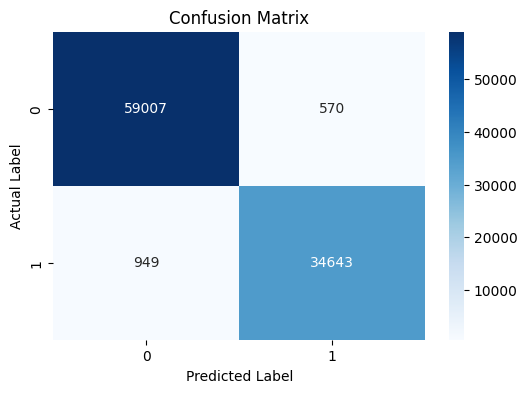

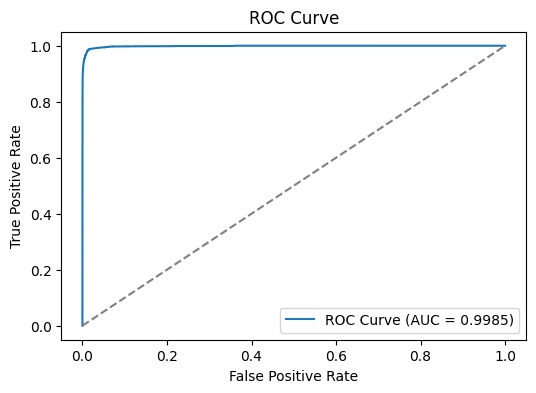

In [108]:
# Predictions using the best model
y_pred = classifiers['XGB Classifier'].predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC-AUC Curve
y_test_proba = classifiers['XGB Classifier'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()